In [1]:
import os
import numpy as np
import pandas as pd
from datetime import datetime

#FROM the sample data of one day to conacatinate all the csv files of each hour into a single one

directory = '/Users/thomas/Desktop/phd_unipv/Industrial_PhD/Technical_documentation/20240707/csv_temp'

one_hr_datframes= []

for file in os.listdir(directory):
    if file.endswith('.csv'):
        file_path = os.path.join(directory, file)
        
        df = pd.read_csv(file_path, sep=';')

        

        one_hr_datframes.append(df)

        
  
#dataframe file conatining one day data 
master_df = pd.concat(one_hr_datframes, ignore_index=True)

In [8]:
#converting time column to datetime to recognise the dates
master_df['time'] = pd.to_datetime(master_df['time'], format='%Y/%m/%d %H:%M:%S')

master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   time        96 non-null     datetime64[ns]
 1   2301296F_t  96 non-null     float64       
 2   2301327F_t  0 non-null      float64       
 3   2301335F_t  96 non-null     float64       
 4   2301350F_t  96 non-null     float64       
 5   2301359F_t  96 non-null     float64       
 6   2301362F_t  96 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 5.4 KB


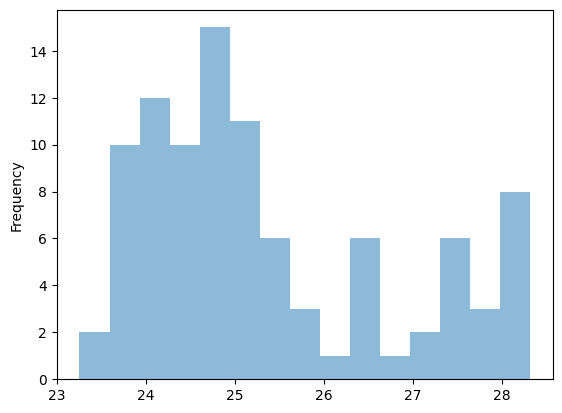

In [9]:
histogram = master_df['2301296F_t'].plot.hist(bins=15, alpha=0.5)

<AxesSubplot: xlabel='time'>

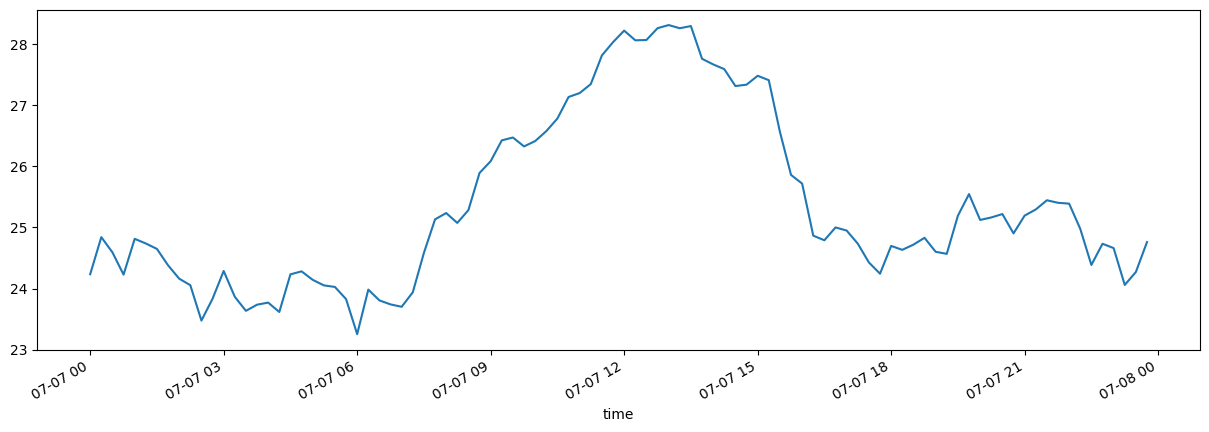

In [10]:
#selecting the datetime column to index for resampling 
master_df = master_df.set_index('time')
master_df['2301296F_t'].plot(figsize=(15,5))